In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

<h3>Feature Selection</h3>

In [6]:
df_copy = pd.DataFrame()

columns_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in columns_to_add:
    df_copy[element] = df[element]
    
df_copy

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250
...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


In [8]:
df_copy.describe()

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.368545,0.227927,0.316308,0.244975
std,0.196813,0.294351,0.230461,0.209842,0.226178,0.214712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.185135,0.079383,0.150000,0.125000
50%,0.404762,0.214286,0.329663,0.156611,0.250000,0.187500
75%,0.571429,0.464286,0.502469,0.301351,0.450000,0.437500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_copy.values

In [10]:
train_data

array([[0.80952381, 0.28571429, 0.23112189, 0.28617054, 0.4       ,
        0.4375    ],
       [0.42857143, 0.        , 0.23347612, 0.14718332, 0.05      ,
        0.5       ],
       [0.16666667, 0.53571429, 0.74701738, 0.14464368, 0.05      ,
        0.3125    ],
       ...,
       [0.35714286, 0.17857143, 0.43693136, 0.15922734, 0.55      ,
        0.4375    ],
       [0.35714286, 0.10714286, 0.32327327, 0.05737263, 0.15      ,
        0.125     ],
       [0.64285714, 0.07142857, 0.32514957, 0.12990611, 0.5       ,
        0.25      ]])

In [11]:
type(train_data)

numpy.ndarray

<h3>K-means (second try)</h3>

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2807235687711 silhouette =  0.18593840101067874

k =  4 SSE =  174.23663260037708 silhouette =  0.19056815668878102

k =  5 SSE =  157.40421613895148 silhouette =  0.18740646473289804

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  135.1663450689183 silhouette =  0.17569048127122056

k =  8 SSE =  127.34339833585393 silhouette =  0.18868526441657302

k =  9 SSE =  120.33738419682322 silhouette =  0.18991280712344577

k =  10 SSE =  115.28011439911327 silhouette =  0.16785962748985045

k =  11 SSE =  111.10760270839543 silhouette =  0.17067652519252843

k =  12 SSE =  106.71867546053798 silhouette =  0.16754420746723636

k =  13 SSE =  103.73045999388613 silhouette =  0.16604037000015232

k =  14 SSE =  99.80572062941354 silhouette =  0.17105170675017523

k =  15 SSE =  97.36414054086981 silhouette =  0.1651484028200314

k =  16 SSE =  93.26159393259431 silhouette =  0.

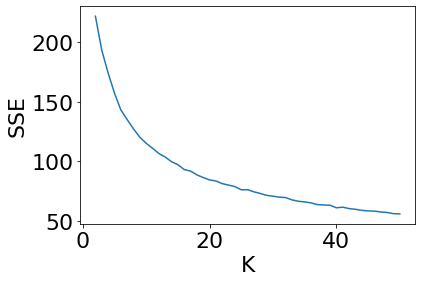

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2809227353476 silhouette =  0.18681140354887998

k =  4 SSE =  174.21971716244516 silhouette =  0.19031539570568082

k =  5 SSE =  157.36856484605963 silhouette =  0.18595090768069758

k =  6 SSE =  143.36020372597434 silhouette =  0.19312137894303164

k =  7 SSE =  134.57413489785503 silhouette =  0.19033719329873194

k =  8 SSE =  127.31885843620857 silhouette =  0.17741864420732906

k =  9 SSE =  120.46428719385344 silhouette =  0.1840023475106791

k =  10 SSE =  115.27779603802244 silhouette =  0.1664522973083671

k =  11 SSE =  111.19333868121686 silhouette =  0.16970963150599766

k =  12 SSE =  107.04276250125596 silhouette =  0.172176346689528

k =  13 SSE =  102.49657390977454 silhouette =  0.17460025650572736

k =  14 SSE =  99.8016681333293 silhouette =  0.17193671128894747

k =  15 SSE =  96.89943743585727 silhouette =  0.16044839887799064

k =  16 SSE =  94.6566371387164 silhouette =  0.1606

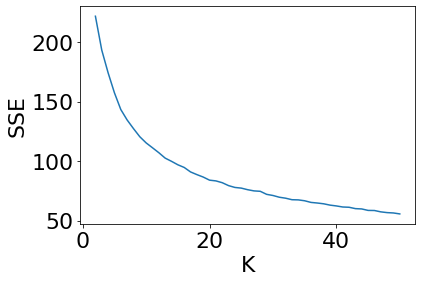

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.385835888057 silhouette =  0.18872529771690344

k =  6 SSE =  143.35866972391452 silhouette =  0.1925631844234883

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.17266376922487 silhouette =  0.17933795448344458

k =  9 SSE =  120.45801100607333 silhouette =  0.1847669946134818

k =  10 SSE =  116.22355692977189 silhouette =  0.18126986619862506

k =  11 SSE =  111.58990147758301 silhouette =  0.18575982039896832

k =  12 SSE =  106.54309700810903 silhouette =  0.17135358595306252

k =  13 SSE =  103.33842896482689 silhouette =  0.17268627508282214

k =  14 SSE =  99.83927619660795 silhouette =  0.17415745011533365

k =  15 SSE =  97.33982377004985 silhouette =  0.16948671182018268

k =  16 SSE =  93.68836815507906 silhouette =  0.1715

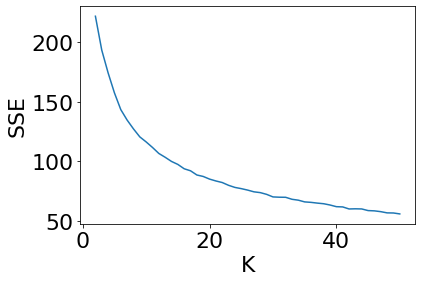

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.23663260037708 silhouette =  0.19056815668878102

k =  5 SSE =  157.43659708408364 silhouette =  0.18770805775126018

k =  6 SSE =  143.42506523193046 silhouette =  0.18616586075152725

k =  7 SSE =  134.959515906723 silhouette =  0.18143008779506356

k =  8 SSE =  127.33032138297288 silhouette =  0.18461743178425197

k =  9 SSE =  120.63933092018219 silhouette =  0.184618236502839

k =  10 SSE =  116.21335946033523 silhouette =  0.18379233196247627

k =  11 SSE =  111.61585528201972 silhouette =  0.1702463241095397

k =  12 SSE =  107.46432675419948 silhouette =  0.1743608990740147

k =  13 SSE =  103.34873009253575 silhouette =  0.1653745263152235

k =  14 SSE =  99.95990594119424 silhouette =  0.17126940653901063

k =  15 SSE =  97.35824621347862 silhouette =  0.16428892189779595

k =  16 SSE =  94.83780211064845 silhouette =  0.1646

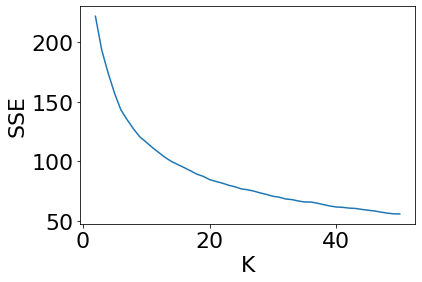

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.3818461308298 silhouette =  0.19053091153203983

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.93910563317945 silhouette =  0.17678836409281098

k =  8 SSE =  127.32437556158946 silhouette =  0.1789424664916212

k =  9 SSE =  120.32888514731015 silhouette =  0.1890569954834125

k =  10 SSE =  115.31589090342159 silhouette =  0.16542290517657468

k =  11 SSE =  112.39745038505087 silhouette =  0.16714524564785568

k =  12 SSE =  107.28048725776972 silhouette =  0.17221795560230066

k =  13 SSE =  103.59275175131296 silhouette =  0.16389131608840313

k =  14 SSE =  99.811113680367 silhouette =  0.16791532293861042

k =  15 SSE =  96.68993239853161 silhouette =  0.16763743615249557

k =  16 SSE =  93.21356828254434 silhouette =  0.174

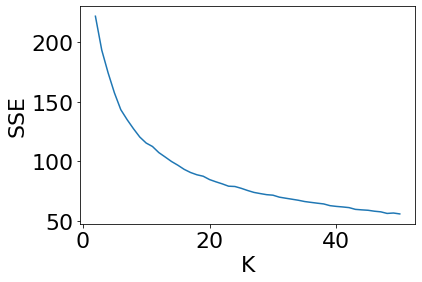

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268316 silhouette =  0.18687956637032344

k =  4 SSE =  174.25829697187018 silhouette =  0.19208024085242734

k =  5 SSE =  157.4038449674147 silhouette =  0.18658534699568827

k =  6 SSE =  143.34264242985338 silhouette =  0.19162035341231826

k =  7 SSE =  134.57237215438414 silhouette =  0.18853501634225805

k =  8 SSE =  127.32831843580928 silhouette =  0.17911307561300588

k =  9 SSE =  120.33566293167605 silhouette =  0.19053623160468192

k =  10 SSE =  115.30743848809189 silhouette =  0.1658451611181109

k =  11 SSE =  111.19705852728066 silhouette =  0.1694450206226396

k =  12 SSE =  107.0830805791018 silhouette =  0.1723424104673989

k =  13 SSE =  103.41575850163913 silhouette =  0.1748767573226903

k =  14 SSE =  99.6869244214092 silhouette =  0.16831939078752964

k =  15 SSE =  96.99561035357735 silhouette =  0.1691402188265435

k =  16 SSE =  93.98110411361553 silhouette =  0.16546

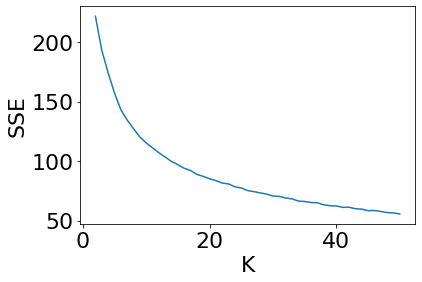

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.38599491527052 silhouette =  0.1866154374104879

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.32717979044148 silhouette =  0.17315296999049015

k =  9 SSE =  120.45430756699419 silhouette =  0.18739588929398313

k =  10 SSE =  116.0186717362971 silhouette =  0.17306758735416725

k =  11 SSE =  111.12732998451565 silhouette =  0.16810560955332926

k =  12 SSE =  107.42383015033006 silhouette =  0.17078921536053274

k =  13 SSE =  102.43499744483752 silhouette =  0.17397501885431613

k =  14 SSE =  100.10285775585176 silhouette =  0.16559682101909615

k =  15 SSE =  96.70465828850008 silhouette =  0.1654453430967667

k =  16 SSE =  94.5658249974529 silhouette =  0.1665

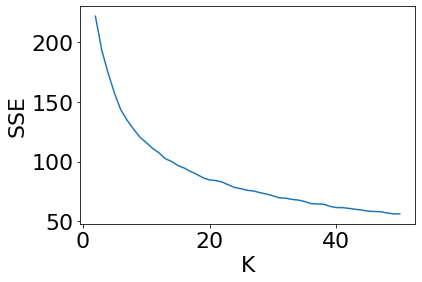

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23061940498116 silhouette =  0.19106177686702988

k =  5 SSE =  157.384976552426 silhouette =  0.1892812384613232

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.60657169065252 silhouette =  0.18859987205124978

k =  8 SSE =  127.19003678058554 silhouette =  0.18135483919948997

k =  9 SSE =  120.4626189389563 silhouette =  0.18544041034324896

k =  10 SSE =  115.54803906250116 silhouette =  0.17374954505042017

k =  11 SSE =  110.58661923707562 silhouette =  0.1678141073687917

k =  12 SSE =  106.60654967091968 silhouette =  0.1710152432726871

k =  13 SSE =  103.0723305610612 silhouette =  0.17106859924532014

k =  14 SSE =  99.63304223078894 silhouette =  0.17169138948067297

k =  15 SSE =  96.373371909404 silhouette =  0.16816629939436867

k =  16 SSE =  94.4809799472874 silhouette =  0.16634607

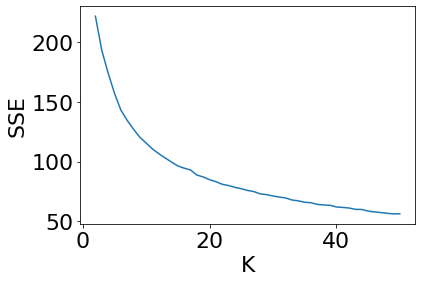

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.25514141101928 silhouette =  0.1913625224582683

k =  5 SSE =  157.3967458584541 silhouette =  0.184014678831581

k =  6 SSE =  143.3338174170033 silhouette =  0.19265134585157245

k =  7 SSE =  134.66493622942687 silhouette =  0.19011877603355198

k =  8 SSE =  127.19695005074162 silhouette =  0.1801918609885534

k =  9 SSE =  120.4644471536313 silhouette =  0.18542220140557905

k =  10 SSE =  115.55144849140181 silhouette =  0.17000615040357533

k =  11 SSE =  111.3985386856108 silhouette =  0.16815429660136036

k =  12 SSE =  107.29078241278978 silhouette =  0.1711521076315173

k =  13 SSE =  103.41645557599118 silhouette =  0.16766484104909138

k =  14 SSE =  99.67182870127691 silhouette =  0.16315289645418424

k =  15 SSE =  96.9807686074918 silhouette =  0.16170739048405905

k =  16 SSE =  94.65906925620068 silhouette =  0.167126169

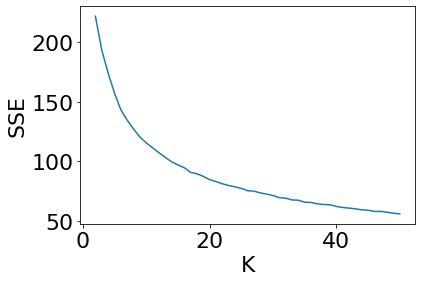

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28029454982394 silhouette =  0.18681140354887998

k =  4 SSE =  174.36221839961115 silhouette =  0.18607453035567073

k =  5 SSE =  157.4130310735726 silhouette =  0.18633499279506022

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.89670100826353 silhouette =  0.18884099012207153

k =  8 SSE =  127.41754946159455 silhouette =  0.18482933123469078

k =  9 SSE =  120.34448757604851 silhouette =  0.18966160191313447

k =  10 SSE =  115.51043851780823 silhouette =  0.17062346615331225

k =  11 SSE =  111.22083296915397 silhouette =  0.16215385044021813

k =  12 SSE =  107.57749442479317 silhouette =  0.15986547195328843

k =  13 SSE =  104.07276301323924 silhouette =  0.1697845671309106

k =  14 SSE =  99.11963153519582 silhouette =  0.17793089266296155

k =  15 SSE =  97.1287845653917 silhouette =  0.16056558308620597

k =  16 SSE =  93.3234725194343 silhouette =  0.17

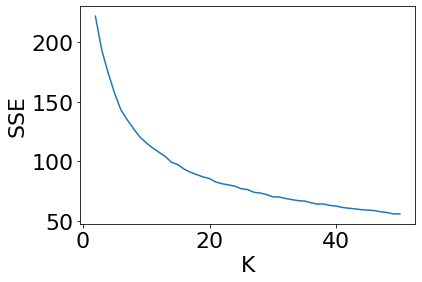

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.22532362564576 silhouette =  0.19009435731270358

k =  5 SSE =  157.36687052602505 silhouette =  0.18771384680575182

k =  6 SSE =  143.36240696190072 silhouette =  0.1922709982257904

k =  7 SSE =  134.57237215438414 silhouette =  0.18853501634225805

k =  8 SSE =  127.23173767208078 silhouette =  0.18331192948981564

k =  9 SSE =  121.49102267931461 silhouette =  0.17777413165890568

k =  10 SSE =  116.11627221959125 silhouette =  0.17603578571036943

k =  11 SSE =  111.23281257521883 silhouette =  0.16887976548722813

k =  12 SSE =  106.50625885938842 silhouette =  0.1695009449938484

k =  13 SSE =  103.63722677769265 silhouette =  0.17854667732260662

k =  14 SSE =  99.14245948432347 silhouette =  0.1769873248053681

k =  15 SSE =  96.92190980196584 silhouette =  0.1692635733757683

k =  16 SSE =  93.93920295212101 silhouette =  0.17

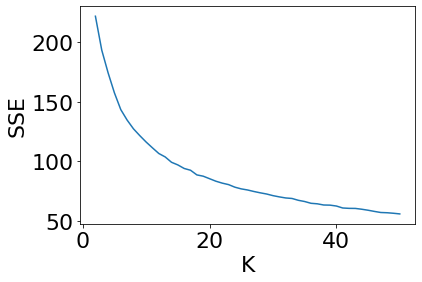

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28322482803432 silhouette =  0.18654881067099688

k =  4 SSE =  174.21750423746656 silhouette =  0.1897837353051047

k =  5 SSE =  157.38362001454905 silhouette =  0.18838075959176476

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.66716546663122 silhouette =  0.1893118159225937

k =  8 SSE =  127.25628376285316 silhouette =  0.1811882806660631

k =  9 SSE =  120.33476652767182 silhouette =  0.1905788816529438

k =  10 SSE =  115.49444710510801 silhouette =  0.17371155426402884

k =  11 SSE =  111.4954685320099 silhouette =  0.19077145432828946

k =  12 SSE =  106.9537155541837 silhouette =  0.17170481640619065

k =  13 SSE =  103.15428640714163 silhouette =  0.1701030301311345

k =  14 SSE =  98.98794055871049 silhouette =  0.17663079475944907

k =  15 SSE =  97.45713770289152 silhouette =  0.16616728596198602

k =  16 SSE =  93.38937993436063 silhouette =  0.16674

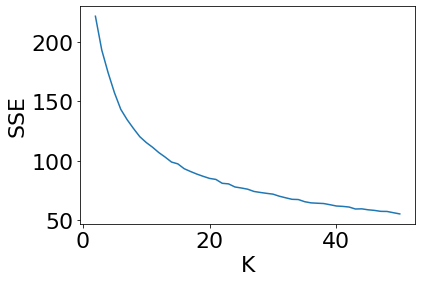

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2748738677077 silhouette =  0.1866158516788242

k =  4 SSE =  174.25809077374888 silhouette =  0.19236182920997044

k =  5 SSE =  157.36520888380676 silhouette =  0.1880559778847153

k =  6 SSE =  143.3347662795845 silhouette =  0.192765395175442

k =  7 SSE =  134.57481749098267 silhouette =  0.18867783572135718

k =  8 SSE =  127.30928840310784 silhouette =  0.18045206627360463

k =  9 SSE =  120.3494844237833 silhouette =  0.18959728926975208

k =  10 SSE =  115.82266471344145 silhouette =  0.18597129411599542

k =  11 SSE =  111.38585864477363 silhouette =  0.1596430769520316

k =  12 SSE =  107.42575698793564 silhouette =  0.15913206170148558

k =  13 SSE =  103.38917363658857 silhouette =  0.16710551321071104

k =  14 SSE =  99.35445261977294 silhouette =  0.1734376658301082

k =  15 SSE =  97.19340824808727 silhouette =  0.16096716344373577

k =  16 SSE =  94.53705642334111 silhouette =  0.162548

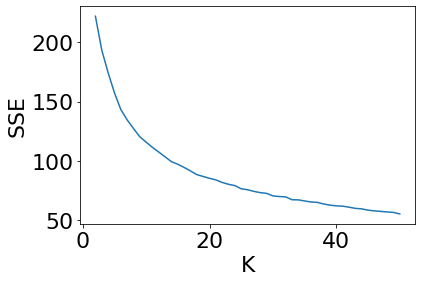

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.37676246217148 silhouette =  0.18713107617274077

k =  6 SSE =  143.35866972391452 silhouette =  0.1925631844234883

k =  7 SSE =  134.57660466699576 silhouette =  0.18832545586710342

k =  8 SSE =  127.18888320059023 silhouette =  0.1804759508939929

k =  9 SSE =  120.40268794663439 silhouette =  0.19000996300768738

k =  10 SSE =  115.36576268603622 silhouette =  0.16507935224524775

k =  11 SSE =  111.94646646326646 silhouette =  0.17861727863462762

k =  12 SSE =  106.5178510484191 silhouette =  0.1696597962048493

k =  13 SSE =  103.31221418369296 silhouette =  0.165034977487479

k =  14 SSE =  100.2143746528319 silhouette =  0.1658591651271732

k =  15 SSE =  97.07326222695872 silhouette =  0.16728522510953853

k =  16 SSE =  94.2974175061349 silhouette =  0.1700712

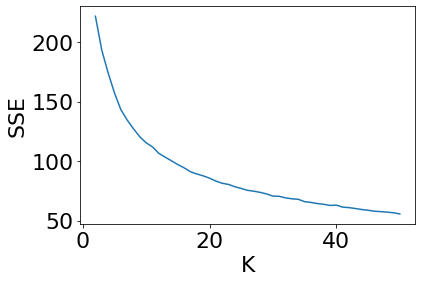

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.22532362564576 silhouette =  0.19009435731270358

k =  5 SSE =  157.3803404839642 silhouette =  0.18573361042462724

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.6654843884328 silhouette =  0.18968921054843102

k =  8 SSE =  127.18635806002132 silhouette =  0.1820269843563576

k =  9 SSE =  120.33825786195949 silhouette =  0.18958657883954344

k =  10 SSE =  115.52606992273347 silhouette =  0.17012783494854453

k =  11 SSE =  111.17642426156769 silhouette =  0.17175499965330782

k =  12 SSE =  106.97752339796605 silhouette =  0.168493130026423

k =  13 SSE =  103.33131761438808 silhouette =  0.17148386277981473

k =  14 SSE =  99.39425550865778 silhouette =  0.17072062502371954

k =  15 SSE =  96.16594387264463 silhouette =  0.177266931585813

k =  16 SSE =  93.24744478337672 silhouette =  0.1735604

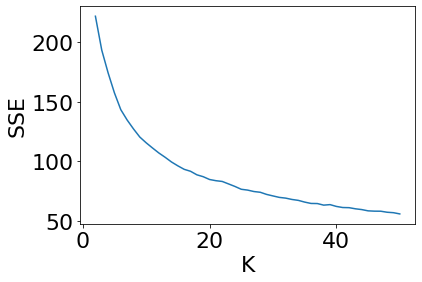

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.21639832909847 silhouette =  0.1897837353051047

k =  5 SSE =  157.37177996055752 silhouette =  0.18838492659294429

k =  6 SSE =  143.3648305060052 silhouette =  0.19340060656813857

k =  7 SSE =  135.09348632878806 silhouette =  0.17856361628552758

k =  8 SSE =  127.16799210516012 silhouette =  0.1785869051965902

k =  9 SSE =  120.48588964656165 silhouette =  0.18218617832230566

k =  10 SSE =  115.6463251211044 silhouette =  0.1626668646691222

k =  11 SSE =  110.55524043846992 silhouette =  0.16867253360817938

k =  12 SSE =  107.50471164349864 silhouette =  0.16484805556809262

k =  13 SSE =  102.47111265441426 silhouette =  0.1741879917762709

k =  14 SSE =  99.55172686715443 silhouette =  0.16695346195827462

k =  15 SSE =  97.11613276392484 silhouette =  0.1689747657982786

k =  16 SSE =  94.49466363656657 silhouette =  0.16539

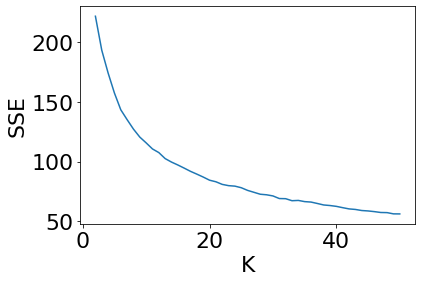

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.5288073120176 silhouette =  0.18052898392813693

k =  5 SSE =  157.40184586283058 silhouette =  0.18836309415970043

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57505008858084 silhouette =  0.1886446412033483

k =  8 SSE =  127.2056593886953 silhouette =  0.18036096150814449

k =  9 SSE =  120.36490142859488 silhouette =  0.1884911495733866

k =  10 SSE =  115.29066261901684 silhouette =  0.1658096506429315

k =  11 SSE =  111.2153947853528 silhouette =  0.16921120363557685

k =  12 SSE =  106.49238686048079 silhouette =  0.17060790761687394

k =  13 SSE =  103.39861446510405 silhouette =  0.16510669627673386

k =  14 SSE =  100.46817292592222 silhouette =  0.1747005982716551

k =  15 SSE =  96.88006747414897 silhouette =  0.16710734673157526

k =  16 SSE =  94.3389418812575 silhouette =  0.170302

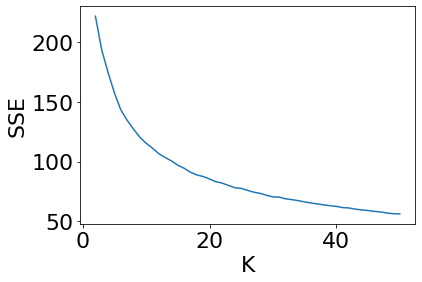

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.33839935100326 silhouette =  0.18608078387776592

k =  5 SSE =  157.37009581494357 silhouette =  0.1888954454328321

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.10348703820739 silhouette =  0.18573406422044123

k =  9 SSE =  120.46151960003245 silhouette =  0.18835545692153838

k =  10 SSE =  115.30308552747701 silhouette =  0.16782916006193127

k =  11 SSE =  110.59541473387957 silhouette =  0.16811949246820054

k =  12 SSE =  106.62849707559191 silhouette =  0.17184184626469895

k =  13 SSE =  103.01815698115686 silhouette =  0.16976181333149917

k =  14 SSE =  100.15610293045685 silhouette =  0.17068138979596614

k =  15 SSE =  97.1696326081084 silhouette =  0.1691713022680609

k =  16 SSE =  94.19727743105365 silhouette =  0.

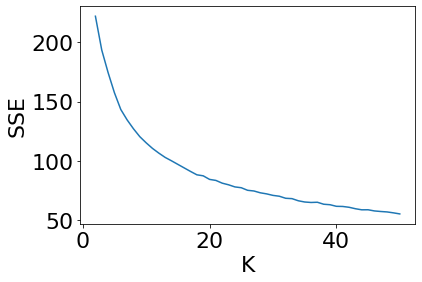

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.33839935100326 silhouette =  0.18608078387776592

k =  5 SSE =  157.39726147563806 silhouette =  0.18552944757370957

k =  6 SSE =  143.3418808624456 silhouette =  0.19194500697639963

k =  7 SSE =  134.97533295796555 silhouette =  0.1849713603593778

k =  8 SSE =  127.10207350243792 silhouette =  0.18602871746172636

k =  9 SSE =  120.6479952798554 silhouette =  0.182989661441219

k =  10 SSE =  115.6046888273332 silhouette =  0.168068876772742

k =  11 SSE =  111.2489842512127 silhouette =  0.15997782936990088

k =  12 SSE =  107.03560523549066 silhouette =  0.16606918980983282

k =  13 SSE =  103.2284406316848 silhouette =  0.1688330536983268

k =  14 SSE =  100.40974314565115 silhouette =  0.16266891272399164

k =  15 SSE =  96.84351258233087 silhouette =  0.17284153983156078

k =  16 SSE =  94.05600990564953 silhouette =  0.168685615

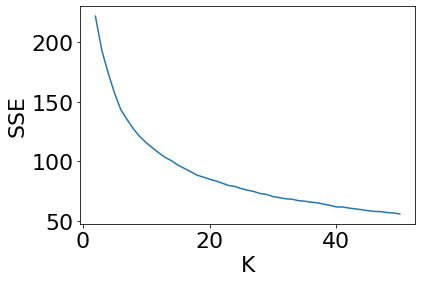

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.23675105094884 silhouette =  0.19078114773183377

k =  5 SSE =  157.39657849038764 silhouette =  0.18957963603096833

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.5754696745747 silhouette =  0.1885281894162992

k =  8 SSE =  127.34999659740498 silhouette =  0.17711196237174703

k =  9 SSE =  120.3710507198697 silhouette =  0.19005003146746355

k =  10 SSE =  115.36836090800182 silhouette =  0.1655768098837413

k =  11 SSE =  111.8733905609153 silhouette =  0.1618044500898517

k =  12 SSE =  107.49534484314786 silhouette =  0.16305357302362528

k =  13 SSE =  103.50673931459964 silhouette =  0.16096856503798296

k =  14 SSE =  100.9030757245323 silhouette =  0.17000881491174563

k =  15 SSE =  96.89492832437641 silhouette =  0.16822410331759463

k =  16 SSE =  94.07203804750915 silhouette =  0.16672

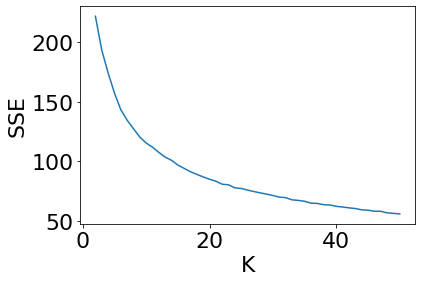

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.38463335272624 silhouette =  0.18865879491124612

k =  6 SSE =  143.360012934793 silhouette =  0.19204725436688302

k =  7 SSE =  134.57165144296476 silhouette =  0.18880467544126914

k =  8 SSE =  127.22735079151973 silhouette =  0.18440827661892908

k =  9 SSE =  120.49127973601611 silhouette =  0.1824284706171631

k =  10 SSE =  115.62149656392137 silhouette =  0.17680934324437925

k =  11 SSE =  111.13856055696361 silhouette =  0.17617664949346823

k =  12 SSE =  106.92132682488658 silhouette =  0.16915385485419948

k =  13 SSE =  103.60685412254888 silhouette =  0.1613702482374066

k =  14 SSE =  100.10122439694243 silhouette =  0.16077766638212934

k =  15 SSE =  97.1111099676535 silhouette =  0.16380986096446895

k =  16 SSE =  93.62213249519102 silhouette =  0.1668

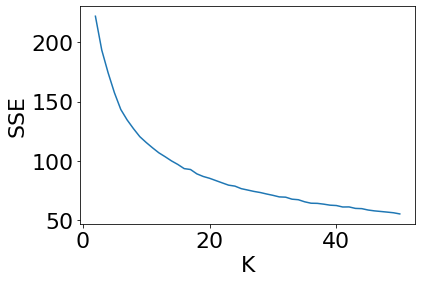

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.2200267572521 silhouette =  0.1906138659224447

k =  5 SSE =  157.40673586847998 silhouette =  0.18568436093960092

k =  6 SSE =  143.3586697239145 silhouette =  0.1925631844234883

k =  7 SSE =  134.57237215438417 silhouette =  0.18853501634225805

k =  8 SSE =  127.16874205582583 silhouette =  0.18062601328091166

k =  9 SSE =  120.4832462099569 silhouette =  0.18568418750550916

k =  10 SSE =  115.3318399663488 silhouette =  0.16307156942770587

k =  11 SSE =  110.99559904417741 silhouette =  0.16443725211388688

k =  12 SSE =  106.90833340225595 silhouette =  0.17001168762800012

k =  13 SSE =  102.73620634186162 silhouette =  0.17003164844773733

k =  14 SSE =  99.75627492894812 silhouette =  0.16628298440420472

k =  15 SSE =  96.17504515924917 silhouette =  0.17216855443991252

k =  16 SSE =  94.00980356542618 silhouette =  0.16956

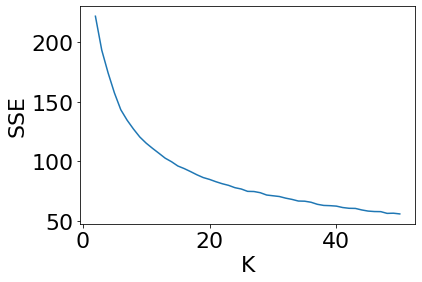

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23766308308313 silhouette =  0.1909259165505585

k =  5 SSE =  157.38613387083896 silhouette =  0.1853606576206317

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.89201972264416 silhouette =  0.18751486418993785

k =  8 SSE =  127.25330753676437 silhouette =  0.18269455876391757

k =  9 SSE =  120.49799907864247 silhouette =  0.18428448088275387

k =  10 SSE =  115.88362125057014 silhouette =  0.18772713024381862

k =  11 SSE =  111.17556922900096 silhouette =  0.1705016812811092

k =  12 SSE =  107.07424377356932 silhouette =  0.16547579150808445

k =  13 SSE =  103.67644455423054 silhouette =  0.16409764535401972

k =  14 SSE =  99.57061108030628 silhouette =  0.17066982416071028

k =  15 SSE =  96.77661346912281 silhouette =  0.16999945336190983

k =  16 SSE =  94.35707825724592 silhouette =  0.1

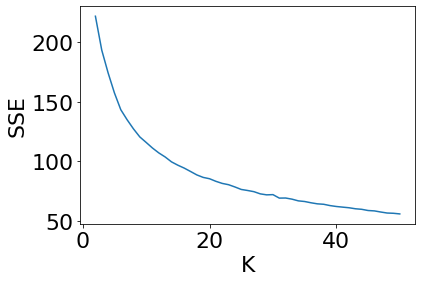

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.39639121243795 silhouette =  0.18948666912535286

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.58061704449057 silhouette =  0.19030896730289337

k =  8 SSE =  127.16019033080516 silhouette =  0.18587435117623097

k =  9 SSE =  120.4488178284489 silhouette =  0.18408933333668268

k =  10 SSE =  115.68513062694736 silhouette =  0.18272042100374347

k =  11 SSE =  111.30775462723635 silhouette =  0.1658757158917226

k =  12 SSE =  107.25866617424063 silhouette =  0.16229969032952524

k =  13 SSE =  103.39618183014495 silhouette =  0.17374240891760354

k =  14 SSE =  99.00052162295835 silhouette =  0.17685402358460608

k =  15 SSE =  95.91194931344718 silhouette =  0.17480656039963569

k =  16 SSE =  93.92524744207032 silhouette =  0.1

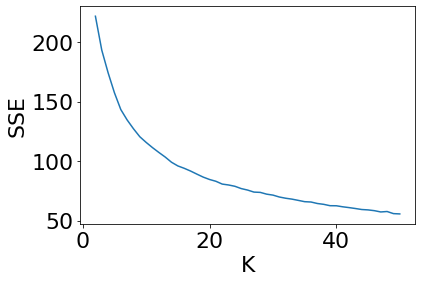

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23675105094884 silhouette =  0.19078114773183377

k =  5 SSE =  157.3838965708678 silhouette =  0.18581407621149032

k =  6 SSE =  143.49194907154563 silhouette =  0.1871297275372047

k =  7 SSE =  134.57165144296476 silhouette =  0.18880467544126914

k =  8 SSE =  127.17529168249263 silhouette =  0.18493508917746604

k =  9 SSE =  120.3531568369667 silhouette =  0.19019284660314384

k =  10 SSE =  115.33498709480769 silhouette =  0.16605138552998056

k =  11 SSE =  110.55552356950925 silhouette =  0.1693865048903119

k =  12 SSE =  107.88653916408552 silhouette =  0.1652270787590201

k =  13 SSE =  103.34336844207627 silhouette =  0.1647898491810311

k =  14 SSE =  99.78744564686869 silhouette =  0.17179424610059382

k =  15 SSE =  96.94358680717625 silhouette =  0.16279386968959114

k =  16 SSE =  93.57943711020572 silhouette =  0.1660

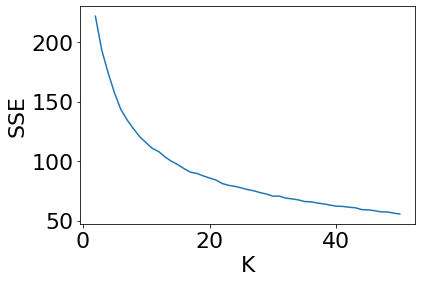

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27941522330212 silhouette =  0.18681140354887998

k =  4 SSE =  174.3471345759313 silhouette =  0.18577456013314017

k =  5 SSE =  157.39430733308714 silhouette =  0.18792512701339423

k =  6 SSE =  143.3382846724946 silhouette =  0.19198118440266326

k =  7 SSE =  134.57664094295217 silhouette =  0.18874084940314573

k =  8 SSE =  127.11410322157063 silhouette =  0.18360351059066385

k =  9 SSE =  120.39505379893194 silhouette =  0.1887894335739183

k =  10 SSE =  115.35538966554451 silhouette =  0.16561855413532325

k =  11 SSE =  110.48849487409119 silhouette =  0.16958824428792188

k =  12 SSE =  106.44092668584733 silhouette =  0.17300449795016398

k =  13 SSE =  103.4052853967379 silhouette =  0.17138247384734862

k =  14 SSE =  99.8146946911031 silhouette =  0.17083970598169382

k =  15 SSE =  96.47129160004185 silhouette =  0.16950489800996518

k =  16 SSE =  94.40093496894096 silhouette =  0.16

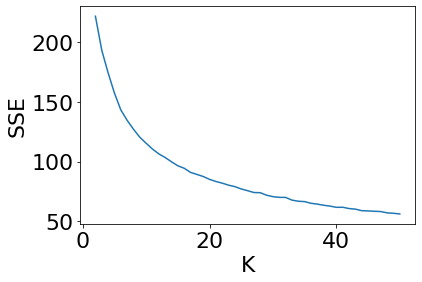

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23080826189084 silhouette =  0.19056409727718673

k =  5 SSE =  157.36736843162825 silhouette =  0.18785847557654534

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.5713703000701 silhouette =  0.19025993117556866

k =  8 SSE =  127.21485979325077 silhouette =  0.1803777602198755

k =  9 SSE =  120.71133636162466 silhouette =  0.18552359954429268

k =  10 SSE =  115.34184311016351 silhouette =  0.1656974849461755

k =  11 SSE =  110.60618523787024 silhouette =  0.1675355786945788

k =  12 SSE =  107.67591357811898 silhouette =  0.1663772815987319

k =  13 SSE =  103.80833407046205 silhouette =  0.17223646817624538

k =  14 SSE =  99.38493246663721 silhouette =  0.17056359060174933

k =  15 SSE =  96.18636787051342 silhouette =  0.16959523897795317

k =  16 SSE =  94.07476190961874 silhouette =  0.16884

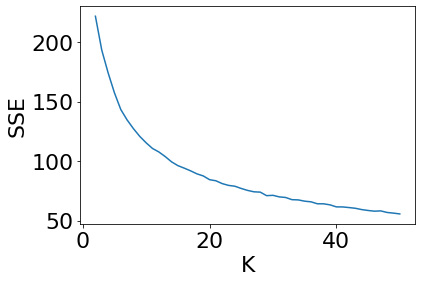

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.35611066048799 silhouette =  0.18374508342497559

k =  5 SSE =  157.39578675920197 silhouette =  0.18629694863211582

k =  6 SSE =  143.3418808624456 silhouette =  0.19194500697639963

k =  7 SSE =  134.66401615719286 silhouette =  0.1895376410771384

k =  8 SSE =  127.2186451676344 silhouette =  0.1793180750662878

k =  9 SSE =  120.33221403262647 silhouette =  0.1898781488624186

k =  10 SSE =  115.29351028237419 silhouette =  0.1669479743976312

k =  11 SSE =  110.67720908643845 silhouette =  0.16846143187328577

k =  12 SSE =  107.38604144227659 silhouette =  0.15662711984099945

k =  13 SSE =  102.57782701257295 silhouette =  0.17159934603208116

k =  14 SSE =  99.66065887329067 silhouette =  0.1737968096686319

k =  15 SSE =  97.37897633685586 silhouette =  0.16302020215789448

k =  16 SSE =  93.08218176425194 silhouette =  0.17333

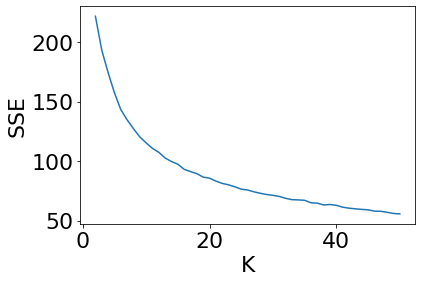

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268322 silhouette =  0.18687956637032344

k =  4 SSE =  174.33425495985878 silhouette =  0.185093752292134

k =  5 SSE =  157.4118719192171 silhouette =  0.18560329398937023

k =  6 SSE =  143.33327404098222 silhouette =  0.1919388299929591

k =  7 SSE =  134.57380132423683 silhouette =  0.18838359622496398

k =  8 SSE =  127.24798606882968 silhouette =  0.18377507702440096

k =  9 SSE =  120.34420465962378 silhouette =  0.19034647381879188

k =  10 SSE =  115.29962042772263 silhouette =  0.1678216866191033

k =  11 SSE =  111.40285475297144 silhouette =  0.16517843574883825

k =  12 SSE =  107.40935046745923 silhouette =  0.1572022477749823

k =  13 SSE =  103.50847852959318 silhouette =  0.1640627747944668

k =  14 SSE =  99.27550981626852 silhouette =  0.168972416876327

k =  15 SSE =  96.17685585729613 silhouette =  0.17705604130397853

k =  16 SSE =  94.17277503021931 silhouette =  0.171120

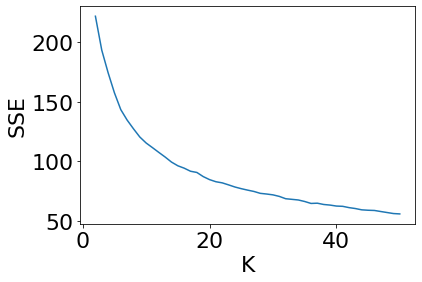

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.24463203009944 silhouette =  0.18851428483946311

k =  5 SSE =  157.43336136291506 silhouette =  0.18493292994485447

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.5910736850007 silhouette =  0.18898470142466425

k =  8 SSE =  127.30609097133579 silhouette =  0.17946263487970407

k =  9 SSE =  122.1744855650426 silhouette =  0.16259609366237868

k =  10 SSE =  115.62571401061192 silhouette =  0.17526590137752024

k =  11 SSE =  110.76750422868815 silhouette =  0.1677702462348053

k =  12 SSE =  106.44955224462045 silhouette =  0.1730083431742325

k =  13 SSE =  103.43211213139823 silhouette =  0.165611738253986

k =  14 SSE =  99.99689310955138 silhouette =  0.16799391172359804

k =  15 SSE =  97.18735060321605 silhouette =  0.16307930487095856

k =  16 SSE =  93.90777753948201 silhouette =  0.171441

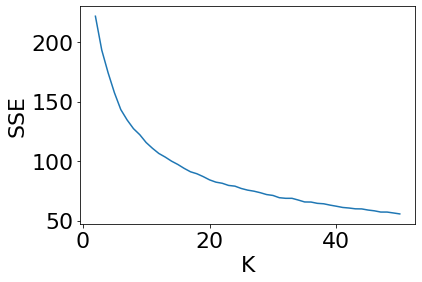

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.33788395475696 silhouette =  0.18491290688109202

k =  5 SSE =  157.38243084669648 silhouette =  0.18498323324407068

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.9765509604523 silhouette =  0.1850449202977624

k =  8 SSE =  127.1663427817552 silhouette =  0.17852791565706694

k =  9 SSE =  120.55642196178862 silhouette =  0.18515677715308793

k =  10 SSE =  115.7743250771121 silhouette =  0.18306476280616088

k =  11 SSE =  111.71779252813575 silhouette =  0.1721061036958609

k =  12 SSE =  106.92526953939759 silhouette =  0.17059472540142953

k =  13 SSE =  102.52230989644256 silhouette =  0.17552514236550693

k =  14 SSE =  100.33384486020279 silhouette =  0.1704905511781942

k =  15 SSE =  97.44800269900666 silhouette =  0.1738159853911856

k =  16 SSE =  93.47673852616559 silhouette =  0.1706837

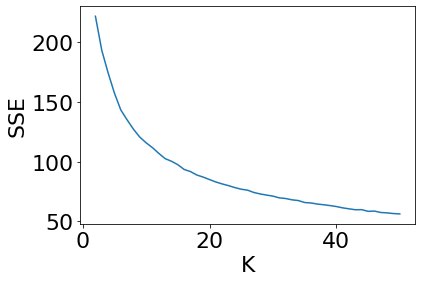

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.38104023768372 silhouette =  0.18533927483961726

k =  6 SSE =  143.33373393487315 silhouette =  0.19287552831482452

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.31899392688375 silhouette =  0.1859773214518277

k =  9 SSE =  120.3610312185612 silhouette =  0.18891288600996772

k =  10 SSE =  115.4561783092124 silhouette =  0.1722832814331342

k =  11 SSE =  111.13504570243309 silhouette =  0.16244081523666606

k =  12 SSE =  107.46287590181115 silhouette =  0.16103452015624167

k =  13 SSE =  102.46469614910043 silhouette =  0.17471514880179015

k =  14 SSE =  99.24780849322278 silhouette =  0.17207144058341298

k =  15 SSE =  96.38083358876563 silhouette =  0.17441639831101519

k =  16 SSE =  93.80384810262512 silhouette =  0.172

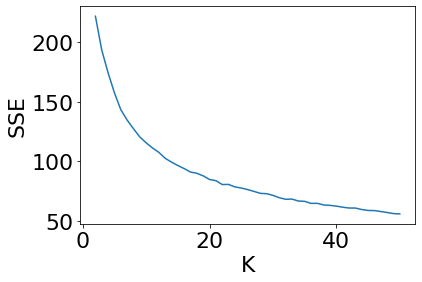

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.24204916420624 silhouette =  0.18896950765360676

k =  5 SSE =  158.0870968411129 silhouette =  0.18810368908738753

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.57499061808858 silhouette =  0.19129975206887584

k =  8 SSE =  127.11449608872276 silhouette =  0.1859200937926972

k =  9 SSE =  120.35256395703432 silhouette =  0.19064572375256875

k =  10 SSE =  115.81265314935793 silhouette =  0.18697397800628918

k =  11 SSE =  110.660797121377 silhouette =  0.16540709419736538

k =  12 SSE =  106.6035960278322 silhouette =  0.17027150754603212

k =  13 SSE =  103.21847329001825 silhouette =  0.17199728688267577

k =  14 SSE =  99.29438594377714 silhouette =  0.167867467809801

k =  15 SSE =  96.92328236433669 silhouette =  0.16241025256703454

k =  16 SSE =  93.52856291677114 silhouette =  0.1690

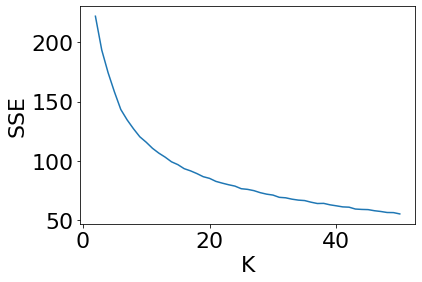

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.21927597337705 silhouette =  0.18990614756155444

k =  5 SSE =  157.38497655242602 silhouette =  0.1892812384613232

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.66716546663122 silhouette =  0.1893118159225937

k =  8 SSE =  127.20312236985177 silhouette =  0.1785047835604718

k =  9 SSE =  121.6550338985926 silhouette =  0.17411818190824815

k =  10 SSE =  115.23943029037895 silhouette =  0.16647448477342716

k =  11 SSE =  111.19378134645342 silhouette =  0.170219765065012

k =  12 SSE =  107.33294899941556 silhouette =  0.18514681034591682

k =  13 SSE =  104.04403600187646 silhouette =  0.16194682672449906

k =  14 SSE =  100.80987077068869 silhouette =  0.1627848189541116

k =  15 SSE =  96.75908785183454 silhouette =  0.16425515084127454

k =  16 SSE =  94.57598292298644 silhouette =  0.1642

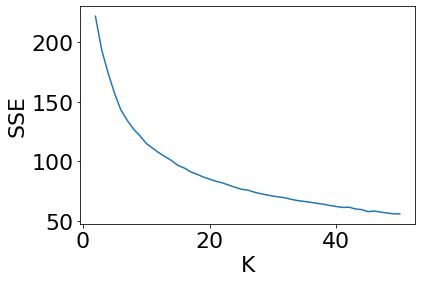

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.3398090728364 silhouette =  0.18608078387776592

k =  5 SSE =  157.38055975348217 silhouette =  0.18623707256209257

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  135.0090468607349 silhouette =  0.18222314813228233

k =  8 SSE =  127.75838204956744 silhouette =  0.18213049931250608

k =  9 SSE =  120.41473682858896 silhouette =  0.18593055144779566

k =  10 SSE =  115.33831649167713 silhouette =  0.16655252471828066

k =  11 SSE =  111.0424116646285 silhouette =  0.1696542483646112

k =  12 SSE =  107.07836240350287 silhouette =  0.17209863677860843

k =  13 SSE =  103.08900792388009 silhouette =  0.16825513736514094

k =  14 SSE =  99.7359070148795 silhouette =  0.16944140783103182

k =  15 SSE =  96.00911584691411 silhouette =  0.17325905058398378

k =  16 SSE =  93.93832358197577 silhouette =  0.17326

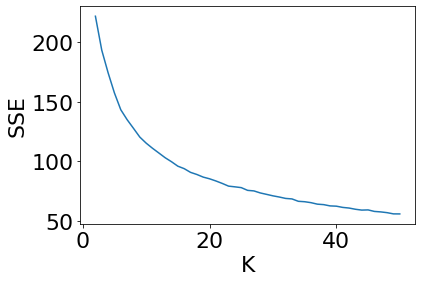

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.40035256128797 silhouette =  0.18441003106577988

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.86631292697498 silhouette =  0.18684384383880404

k =  8 SSE =  127.46475284279933 silhouette =  0.18416247506847352

k =  9 SSE =  120.41325058889682 silhouette =  0.18845336991333975

k =  10 SSE =  115.25962019959748 silhouette =  0.16651353826173027

k =  11 SSE =  111.03692251530306 silhouette =  0.1700526726196403

k =  12 SSE =  106.41194816674036 silhouette =  0.1732617000925289

k =  13 SSE =  103.68221677109149 silhouette =  0.165374801952864

k =  14 SSE =  100.28324188683013 silhouette =  0.15774658070318676

k =  15 SSE =  97.59660900882535 silhouette =  0.15948715930064464

k =  16 SSE =  93.46810785281745 silhouette =  0.

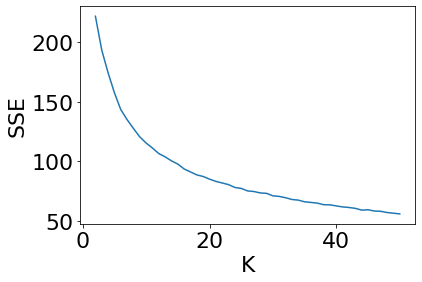

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.26224422360727 silhouette =  0.18967906281837146

k =  5 SSE =  158.11184678829218 silhouette =  0.18783593086860506

k =  6 SSE =  143.45126905681136 silhouette =  0.18706687459149027

k =  7 SSE =  134.58470437226345 silhouette =  0.189106950309345

k =  8 SSE =  127.17066331428518 silhouette =  0.18109951672081342

k =  9 SSE =  120.37409831626039 silhouette =  0.18937526583274158

k =  10 SSE =  115.26058627399199 silhouette =  0.16693839523269713

k =  11 SSE =  111.30897814222813 silhouette =  0.16933344389195484

k =  12 SSE =  106.41659648402369 silhouette =  0.1728721692226174

k =  13 SSE =  102.76693941494644 silhouette =  0.17373024510654242

k =  14 SSE =  100.2306580967899 silhouette =  0.17647442704239405

k =  15 SSE =  96.66736429557685 silhouette =  0.16354354312181216

k =  16 SSE =  93.9023860027983 silhouette =  0.1

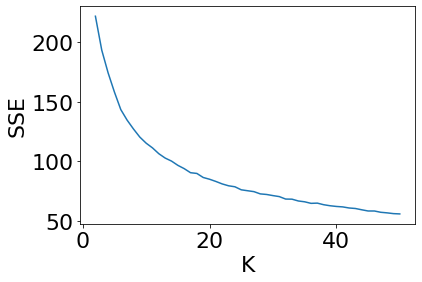

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.3471345759313 silhouette =  0.18577456013314017

k =  5 SSE =  157.38851757040266 silhouette =  0.18569582569197748

k =  6 SSE =  143.33247094894585 silhouette =  0.19231792362445055

k =  7 SSE =  134.57426891838983 silhouette =  0.19170357872211874

k =  8 SSE =  127.53312636051118 silhouette =  0.18059927022674122

k =  9 SSE =  120.4546498154045 silhouette =  0.18716876434075497

k =  10 SSE =  115.54395051425742 silhouette =  0.17239571262894182

k =  11 SSE =  111.13855311698582 silhouette =  0.1706891716402515

k =  12 SSE =  107.71896794475195 silhouette =  0.1548343477327859

k =  13 SSE =  103.811366503646 silhouette =  0.1619855860640963

k =  14 SSE =  99.94167921971848 silhouette =  0.16679613054044626

k =  15 SSE =  97.8438128011042 silhouette =  0.16709478767743674

k =  16 SSE =  94.31811704047338 silhouette =  0.1624032

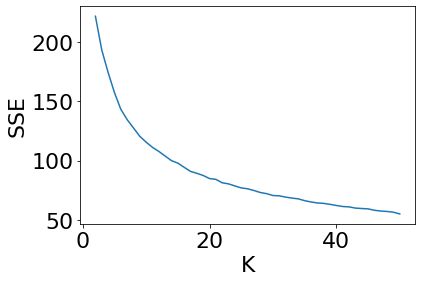

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.33425495985878 silhouette =  0.185093752292134

k =  5 SSE =  157.37708555429768 silhouette =  0.1882839996564821

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.67228017859335 silhouette =  0.18843442688235684

k =  8 SSE =  127.23291495290113 silhouette =  0.18352827006550984

k =  9 SSE =  121.249898654001 silhouette =  0.18298364151237806

k =  10 SSE =  115.36085421769052 silhouette =  0.1628612331681195

k =  11 SSE =  111.6376927940144 silhouette =  0.16273605087639859

k =  12 SSE =  107.29919797426506 silhouette =  0.16395479638297558

k =  13 SSE =  102.4467169395569 silhouette =  0.17428940776138957

k =  14 SSE =  99.15126769946129 silhouette =  0.17716232662708248

k =  15 SSE =  97.5903702588788 silhouette =  0.16863344969371294

k =  16 SSE =  94.04800388218875 silhouette =  0.1684242

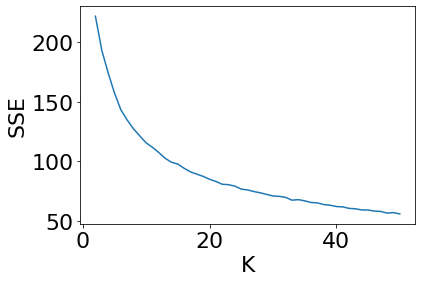

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.3329621062474 silhouette =  0.18499577220922744

k =  5 SSE =  157.36977091485406 silhouette =  0.18606395196594958

k =  6 SSE =  143.3338174170033 silhouette =  0.19265134585157245

k =  7 SSE =  134.66667463515373 silhouette =  0.18915310628145873

k =  8 SSE =  127.33031210109276 silhouette =  0.18562417550052673

k =  9 SSE =  120.37708829529195 silhouette =  0.18702012417268277

k =  10 SSE =  116.2770208003896 silhouette =  0.15991376692241865

k =  11 SSE =  111.16890933780161 silhouette =  0.16836963730690047

k =  12 SSE =  108.0279351813348 silhouette =  0.16107012177091

k =  13 SSE =  103.91831967526572 silhouette =  0.1633966497772554

k =  14 SSE =  100.38238658742253 silhouette =  0.16652981777251386

k =  15 SSE =  97.21419917617646 silhouette =  0.16449748470467376

k =  16 SSE =  94.23279492658473 silhouette =  0.166120

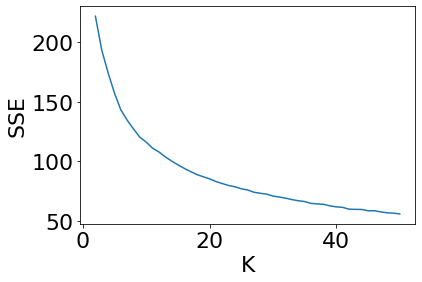

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28029454982394 silhouette =  0.18681140354887998

k =  4 SSE =  174.25367149964563 silhouette =  0.19043886874164387

k =  5 SSE =  157.37484283660638 silhouette =  0.18602053241380673

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.59673171340205 silhouette =  0.18981484331894005

k =  8 SSE =  127.14547260174601 silhouette =  0.18351759185659952

k =  9 SSE =  120.39505379893194 silhouette =  0.1887894335739183

k =  10 SSE =  115.79450954251996 silhouette =  0.16155666521519269

k =  11 SSE =  111.12603042849446 silhouette =  0.16922693311298553

k =  12 SSE =  107.33013831977654 silhouette =  0.17058550704907025

k =  13 SSE =  103.21418241664158 silhouette =  0.17167420619136953

k =  14 SSE =  99.68523420320562 silhouette =  0.16251136993257506

k =  15 SSE =  97.55629551127136 silhouette =  0.17143237394836666

k =  16 SSE =  94.12555903799233 silhouette =  

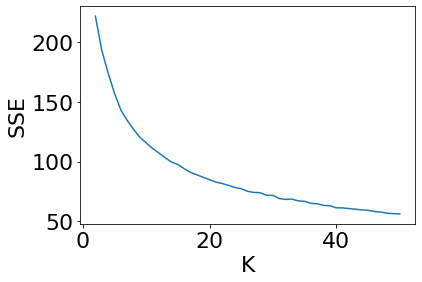

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268316 silhouette =  0.18687956637032344

k =  4 SSE =  174.23237829610636 silhouette =  0.19030023285070147

k =  5 SSE =  158.1813619328726 silhouette =  0.18737444640145948

k =  6 SSE =  143.36572282442845 silhouette =  0.1933742584703681

k =  7 SSE =  134.57515009199224 silhouette =  0.18855803453994094

k =  8 SSE =  127.2777933419645 silhouette =  0.1850406518845862

k =  9 SSE =  120.36694515660244 silhouette =  0.18794314150351163

k =  10 SSE =  115.51404803054284 silhouette =  0.17235164514493714

k =  11 SSE =  111.27199365688074 silhouette =  0.1761528740793521

k =  12 SSE =  107.11899930680747 silhouette =  0.17332090341831013

k =  13 SSE =  103.5058014685914 silhouette =  0.16767055053406035

k =  14 SSE =  100.29043784730626 silhouette =  0.16312549535441564

k =  15 SSE =  96.77823366823685 silhouette =  0.16937960411705777

k =  16 SSE =  93.7933963463434 silhouette =  0.169

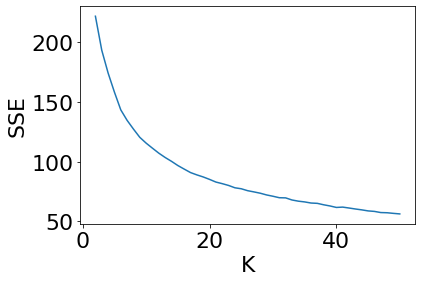

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28029454982396 silhouette =  0.18681140354887998

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.39657849038764 silhouette =  0.18957963603096833

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.32363711617626 silhouette =  0.1859797103265639

k =  9 SSE =  120.47642315267065 silhouette =  0.18457235396020427

k =  10 SSE =  115.26355785785788 silhouette =  0.16749664845061923

k =  11 SSE =  110.55639418717124 silhouette =  0.16841942191011033

k =  12 SSE =  107.12300003692084 silhouette =  0.16563227369257932

k =  13 SSE =  103.4485230566004 silhouette =  0.16507694259573757

k =  14 SSE =  99.47818540322022 silhouette =  0.17052282327003818

k =  15 SSE =  96.8218423642661 silhouette =  0.1666179784006768

k =  16 SSE =  94.30671229515987 silhouette =  0.1

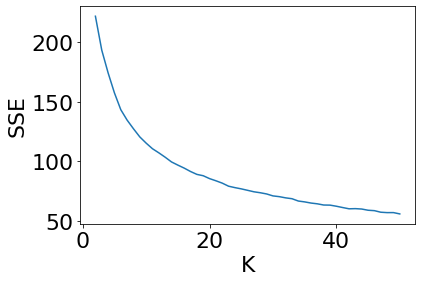

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.2587841942988 silhouette =  0.19221822917940962

k =  5 SSE =  157.37907500828197 silhouette =  0.18665092340203832

k =  6 SSE =  143.3332740409822 silhouette =  0.1919388299929591

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.19075447109033 silhouette =  0.18020255887461734

k =  9 SSE =  120.60636563833383 silhouette =  0.17921667154264348

k =  10 SSE =  115.91052152612238 silhouette =  0.1691646693856205

k =  11 SSE =  111.14055392916623 silhouette =  0.1704470873161543

k =  12 SSE =  107.1328398270725 silhouette =  0.17308288480063982

k =  13 SSE =  103.51519936528791 silhouette =  0.16541632012378968

k =  14 SSE =  99.66342695260384 silhouette =  0.17088523989595594

k =  15 SSE =  96.99455747278255 silhouette =  0.16267052594825557

k =  16 SSE =  94.05290269075024 silhouette =  0.17142

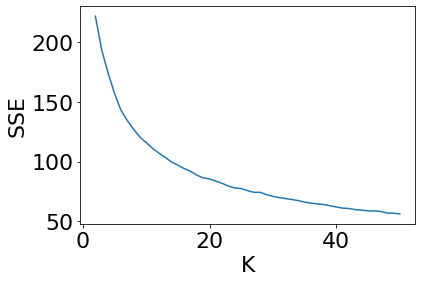

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.36755480054816 silhouette =  0.1884732224723401

k =  6 SSE =  143.35732827998675 silhouette =  0.19325449166479022

k =  7 SSE =  134.57660466699576 silhouette =  0.18832545586710342

k =  8 SSE =  127.31452776160995 silhouette =  0.18612074617787258

k =  9 SSE =  120.36673714982291 silhouette =  0.18760569070456373

k =  10 SSE =  115.27917229305318 silhouette =  0.16725119590702642

k =  11 SSE =  110.73046354591821 silhouette =  0.1652313521935086

k =  12 SSE =  106.91924086142397 silhouette =  0.1716687136621803

k =  13 SSE =  103.22049626580142 silhouette =  0.1698354198674698

k =  14 SSE =  100.18547055260505 silhouette =  0.1595673505046818

k =  15 SSE =  97.35678320480682 silhouette =  0.16816977394867869

k =  16 SSE =  93.5878336973406 silhouette =  0.169

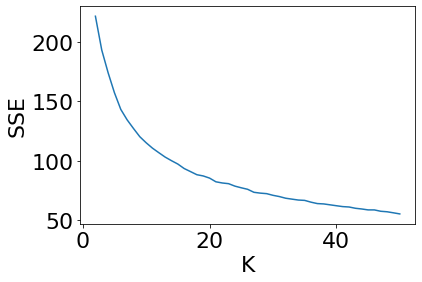

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28029454982396 silhouette =  0.18681140354887998

k =  4 SSE =  174.21750423746656 silhouette =  0.1897837353051047

k =  5 SSE =  157.39726147563806 silhouette =  0.18552944757370957

k =  6 SSE =  143.3332740409822 silhouette =  0.1919388299929591

k =  7 SSE =  134.71848737672244 silhouette =  0.19027619938801077

k =  8 SSE =  127.16917729852008 silhouette =  0.18077615440209793

k =  9 SSE =  120.46351411504337 silhouette =  0.18973093176082262

k =  10 SSE =  115.56681937853581 silhouette =  0.1695483020679287

k =  11 SSE =  110.5726209614672 silhouette =  0.16807022617292283

k =  12 SSE =  107.46982059405995 silhouette =  0.1718974347518122

k =  13 SSE =  103.80903069886915 silhouette =  0.1660248762233052

k =  14 SSE =  99.43801875434055 silhouette =  0.16914906026848195

k =  15 SSE =  96.98635562256592 silhouette =  0.1731324141898474

k =  16 SSE =  93.36509798127277 silhouette =  0.16808

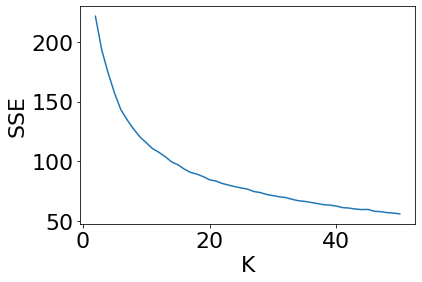

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.24189863190364 silhouette =  0.19095782805297346

k =  5 SSE =  157.37519988908113 silhouette =  0.1866416647250086

k =  6 SSE =  143.33373393487312 silhouette =  0.19287552831482452

k =  7 SSE =  134.57660466699576 silhouette =  0.18832545586710342

k =  8 SSE =  127.2049372857078 silhouette =  0.17986673515983015

k =  9 SSE =  120.49722542842464 silhouette =  0.1844786506284768

k =  10 SSE =  115.29953685086856 silhouette =  0.16655929867038724

k =  11 SSE =  111.15066411034343 silhouette =  0.17031232370583338

k =  12 SSE =  107.75852171665173 silhouette =  0.16914176554253973

k =  13 SSE =  103.34314544118813 silhouette =  0.16869950014514448

k =  14 SSE =  100.29560427275626 silhouette =  0.16116112250778883

k =  15 SSE =  97.53420816388804 silhouette =  0.17516279272694443

k =  16 SSE =  93.73324392184365 silhouette =  0.1

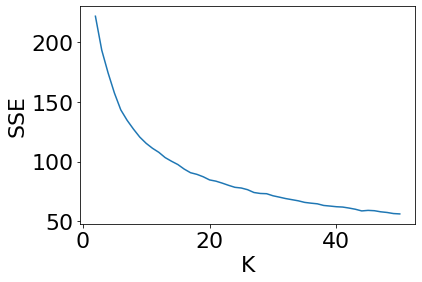

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.3705607350337 silhouette =  0.1861533818604927

k =  6 SSE =  143.3626893605561 silhouette =  0.192815834582173

k =  7 SSE =  134.57481749098267 silhouette =  0.18867783572135718

k =  8 SSE =  127.27950857864455 silhouette =  0.18059307453881307

k =  9 SSE =  120.37519059695647 silhouette =  0.18701780195863127

k =  10 SSE =  115.67837903928597 silhouette =  0.16876848384353285

k =  11 SSE =  111.34260447537635 silhouette =  0.16912615921337654

k =  12 SSE =  107.25257055864678 silhouette =  0.16855854221650038

k =  13 SSE =  102.83940974767432 silhouette =  0.17511308947307702

k =  14 SSE =  100.88614983815296 silhouette =  0.16783980718276534

k =  15 SSE =  97.11430324035416 silhouette =  0.16058588833895088

k =  16 SSE =  94.2637279621975 silhouette =  0.1668

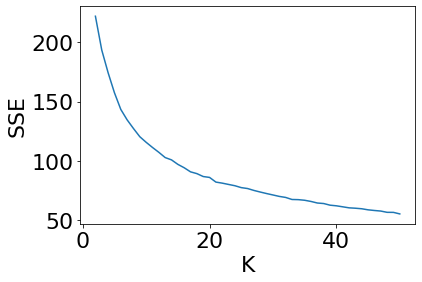

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.21920279649552 silhouette =  0.1902250192859923

k =  5 SSE =  157.38514593717892 silhouette =  0.18919757586004088

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.59770507588533 silhouette =  0.18913416429898008

k =  8 SSE =  127.16823247789553 silhouette =  0.18197220048738696

k =  9 SSE =  121.68374363905235 silhouette =  0.17239224422925195

k =  10 SSE =  115.28820608691719 silhouette =  0.16602030934173745

k =  11 SSE =  110.99968610593444 silhouette =  0.1683857775403746

k =  12 SSE =  106.78303034194364 silhouette =  0.1686833134052828

k =  13 SSE =  103.58050325849095 silhouette =  0.1640989949100116

k =  14 SSE =  99.1536259132242 silhouette =  0.17684294575412057

k =  15 SSE =  95.87832108144956 silhouette =  0.16968766554617035

k =  16 SSE =  94.25987598633273 silhouette =  0.1667

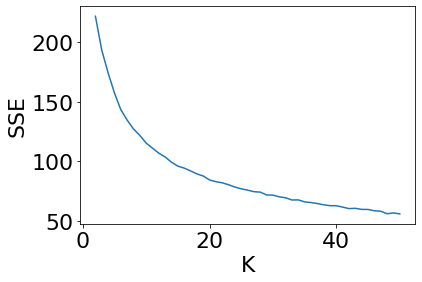

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27380366592106 silhouette =  0.1864350122592963

k =  4 SSE =  174.21920279649552 silhouette =  0.1902250192859923

k =  5 SSE =  157.3686241582732 silhouette =  0.18915409236358954

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.6631316343278 silhouette =  0.1901241520000597

k =  8 SSE =  127.46605085037213 silhouette =  0.17917119419326044

k =  9 SSE =  120.3594868663814 silhouette =  0.18864820709107866

k =  10 SSE =  115.96003694917393 silhouette =  0.18079658898212703

k =  11 SSE =  111.29847523194181 silhouette =  0.17774063152522016

k =  12 SSE =  106.9786712454874 silhouette =  0.17199929691652124

k =  13 SSE =  104.01853778661288 silhouette =  0.15810912001020422

k =  14 SSE =  99.8408351235812 silhouette =  0.17442378301695455

k =  15 SSE =  96.9081802129113 silhouette =  0.17151618975206073

k =  16 SSE =  94.26194890772685 silhouette =  0.1668912

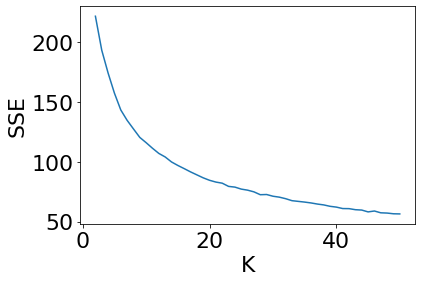

In [12]:
for i in range(0, 50):
    sse_list = list()
    max_k = 50
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300)
        kmeans.fit(train_data)
        sse = kmeans.inertia_
        sse_list.append(sse)

        print("k = ", k, "SSE = ", sse, "silhouette = ", silhouette_score(train_data, kmeans.labels_))
        print()
        
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

From the data it appears that the best value of k is 6.

Then we run the k_means again by initializing the value of n_clusters to 6.

In [13]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', n_init=1000, max_iter=10000)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[0.42284282 0.16514501 0.70390561 0.17335474 0.28984962 0.22791353]
 [0.4526661  0.79106074 0.33306881 0.1942723  0.30988024 0.26272455]
 [0.38549618 0.16262268 0.23764626 0.14637951 0.21698473 0.11211832]
 [0.41097308 0.33229814 0.56848515 0.79074567 0.26376812 0.24275362]
 [0.45866402 0.15128968 0.27611499 0.16233534 0.30347222 0.54817708]
 [0.58201058 0.15972222 0.32346273 0.27287559 0.65046296 0.15798611]]

labels {0: 133, 1: 167, 2: 262, 3: 69, 4: 144, 5: 108}
sse 143.33094961493552
silhouette 0.19242974209952074


In [14]:
diz_kmeans_2 = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_2['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_2['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_2['sse'] = float(kmeans.inertia_)
diz_kmeans_2['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))

In [15]:
with open('diz_kmeans_2.json', 'w') as fp:
    json.dump(diz_kmeans_2, fp, indent=4)

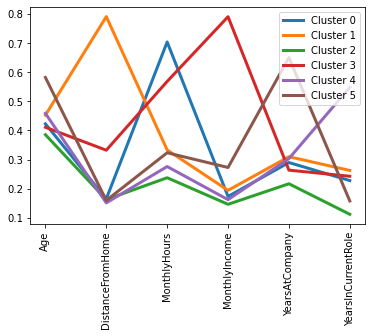

In [18]:
for i in range(0, 6):
    plt.plot(range(0, 6), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
    
plt.xticks(range(0, 6), list(df_copy.columns), rotation = 90)
plt.legend()
plt.show()

In [19]:
df_clusters_2 = df_copy.copy()

In [20]:
df_clusters_2['Labels'] = kmeans.labels_

In [21]:
df_clusters_2

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,Labels
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375,4
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000,4
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125,0
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375,4
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250,2
...,...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000,5
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000,5
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375,4
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250,2


In [22]:
df_clusters_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
 6   Labels              883 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 45.0 KB


In [23]:
np.unique(df_clusters_2['Labels'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [24]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([133, 167, 262,  69, 144, 108]))

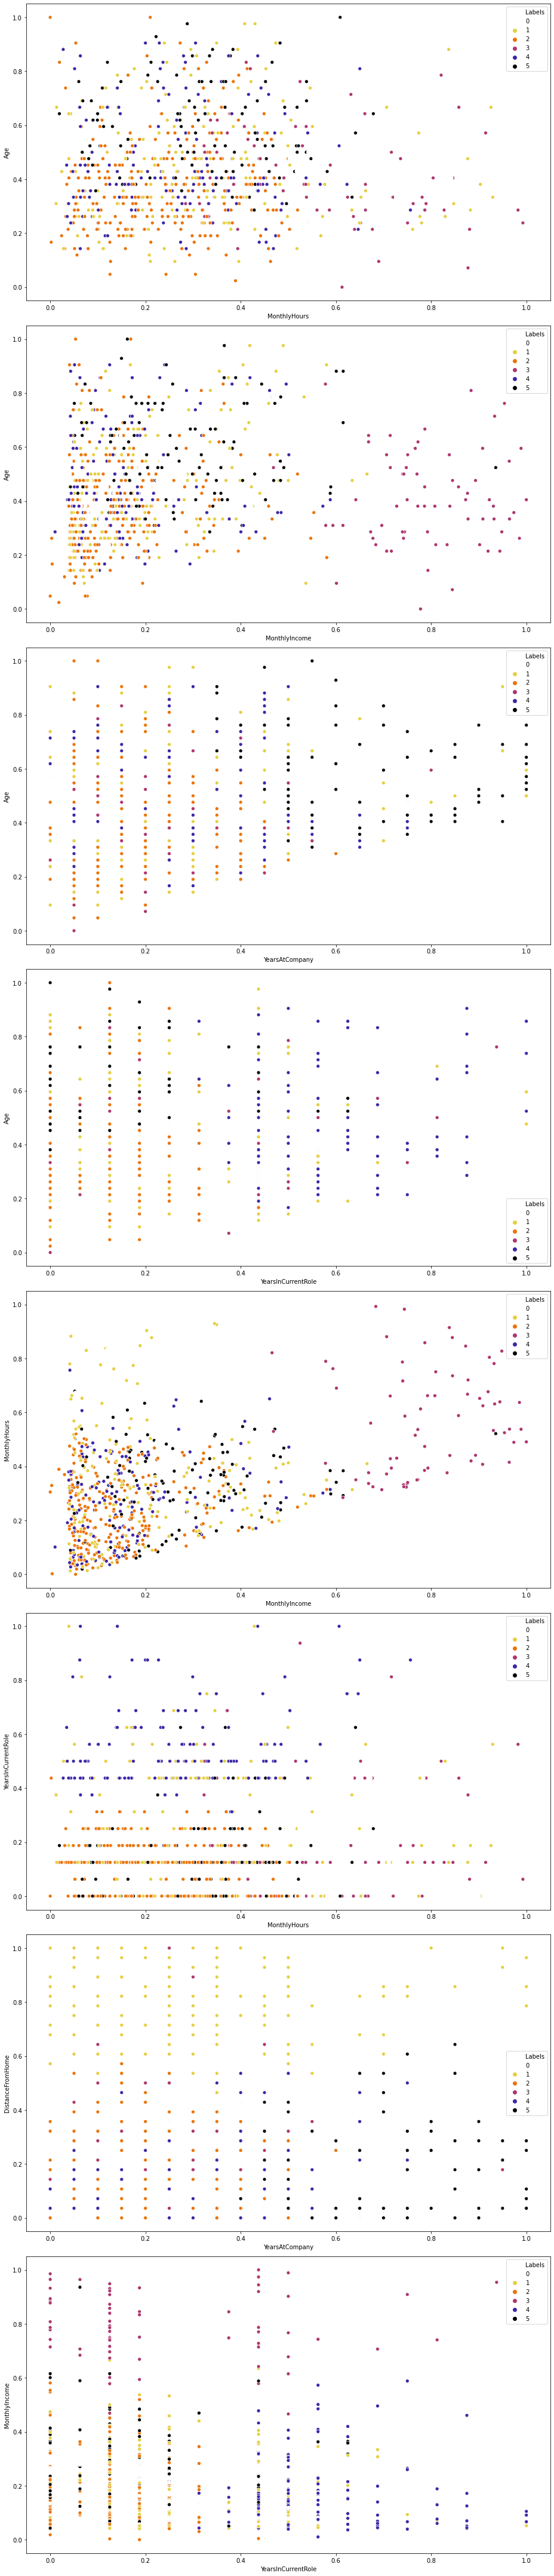

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'DistanceFromHome', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df_clusters_2, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)


plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [33]:
scaler = MinMaxScaler()

In [34]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [35]:
df_NON_normalized_reduct = pd.DataFrame()

col_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in col_to_add:
    df_NON_normalized_reduct[element] = df_NON_normalized[element]
    
df_NON_normalized_reduct

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,52,9,156.61,8446,8,7
1,36,1,157.94,4834,1,8
2,25,16,448.06,4768,1,5
3,33,5,271.91,2799,3,7
4,31,9,106.37,6319,10,2
...,...,...,...,...,...,...
878,38,12,282.47,5343,10,0
879,37,16,76.29,2115,17,0
880,33,6,272.88,5147,11,7
881,33,4,208.67,2500,3,2


In [36]:
X = scaler.fit_transform(df_NON_normalized_reduct.values)

In [37]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

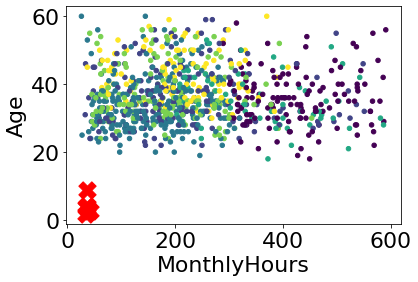

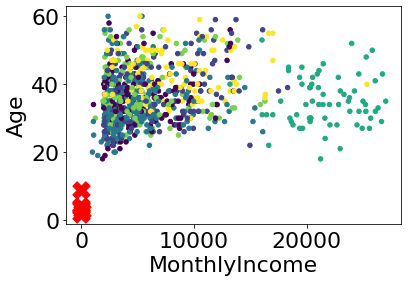

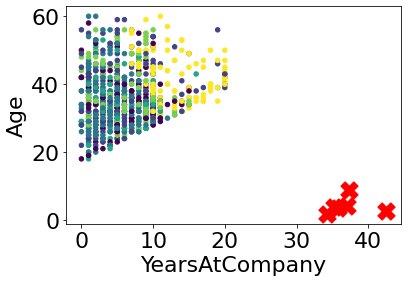

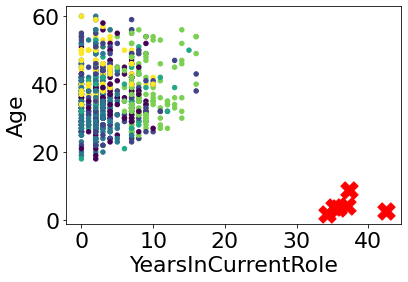

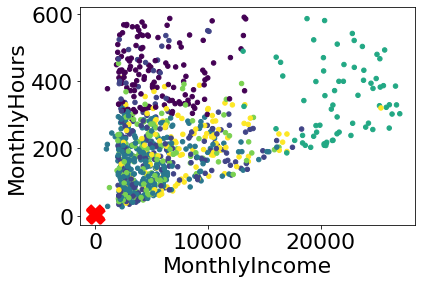

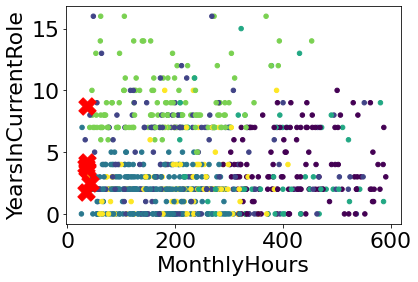

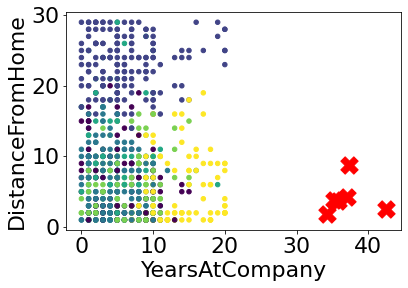

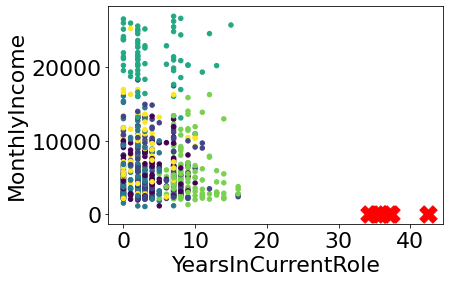

In [38]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'DistanceFromHome'),
                    ('YearsInCurrentRole', 'MonthlyIncome')]

for a, b in features_to_plot:
    plt.scatter(df_NON_normalized_reduct[a], df_NON_normalized_reduct[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 5], s=300, marker='X', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

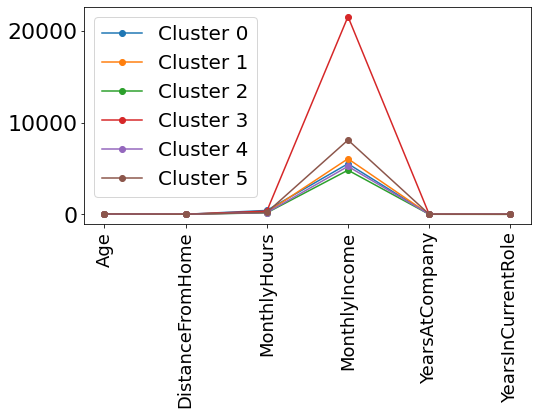

In [39]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_copy.columns)), df_copy.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

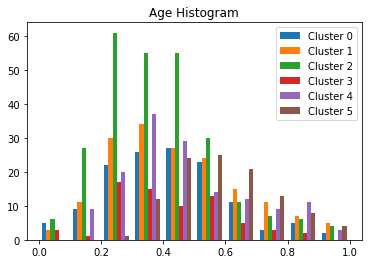

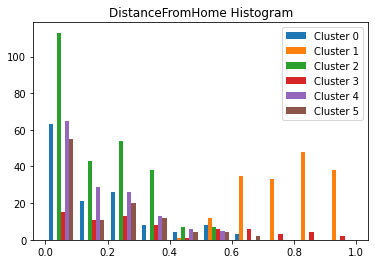

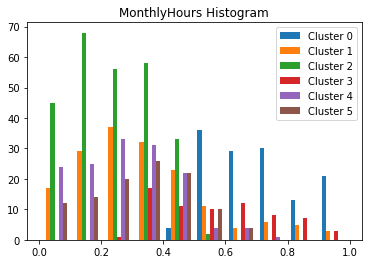

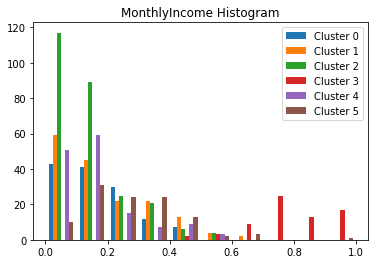

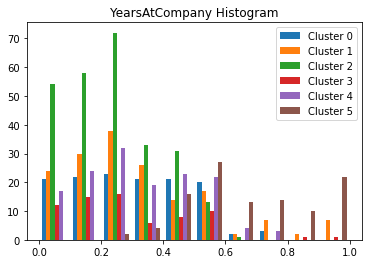

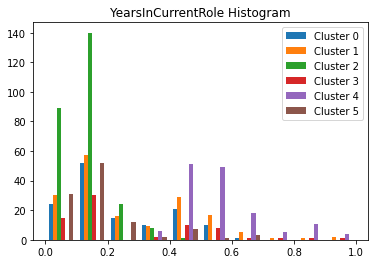

In [28]:
for column in df_copy.columns:
    
    cluster_list = []
    list_num_cluster = []
    
    for num_cluster in np.unique(df_clusters_2['Labels']):
        cluster_list.append(df_clusters_2[df_clusters_2['Labels'] == num_cluster][column])  #distribution
        list_num_cluster.append('Cluster %s' % num_cluster)                                 #num cluster
           
    plt.hist(cluster_list, label = list_num_cluster)
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

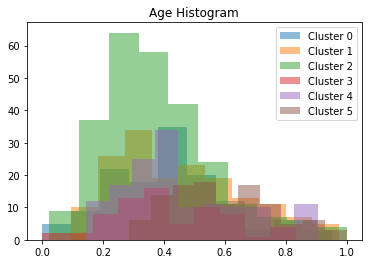

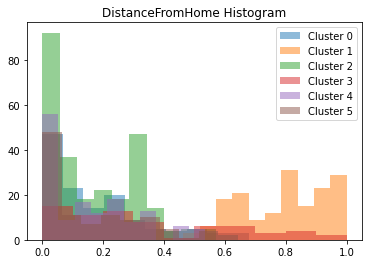

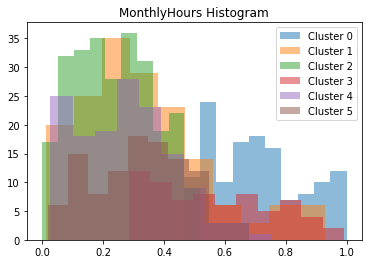

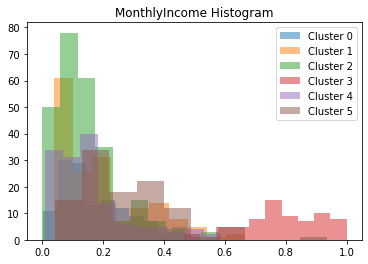

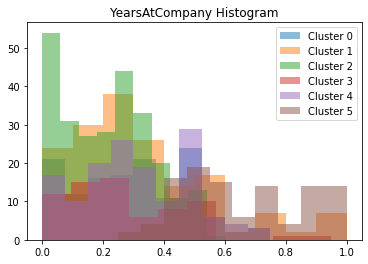

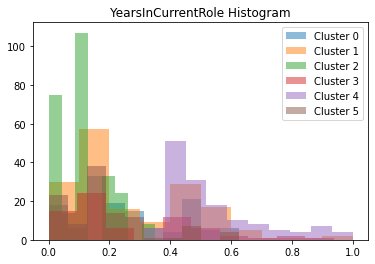

In [29]:
for column in df_copy.columns:
    
    for num_cluster in np.unique(df_clusters_2['Labels']):
        plt.hist(df_clusters_2[df_clusters_2['Labels'] == num_cluster][column], 
                 alpha = 0.5, label = 'Cluster %s' % num_cluster)       
    
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

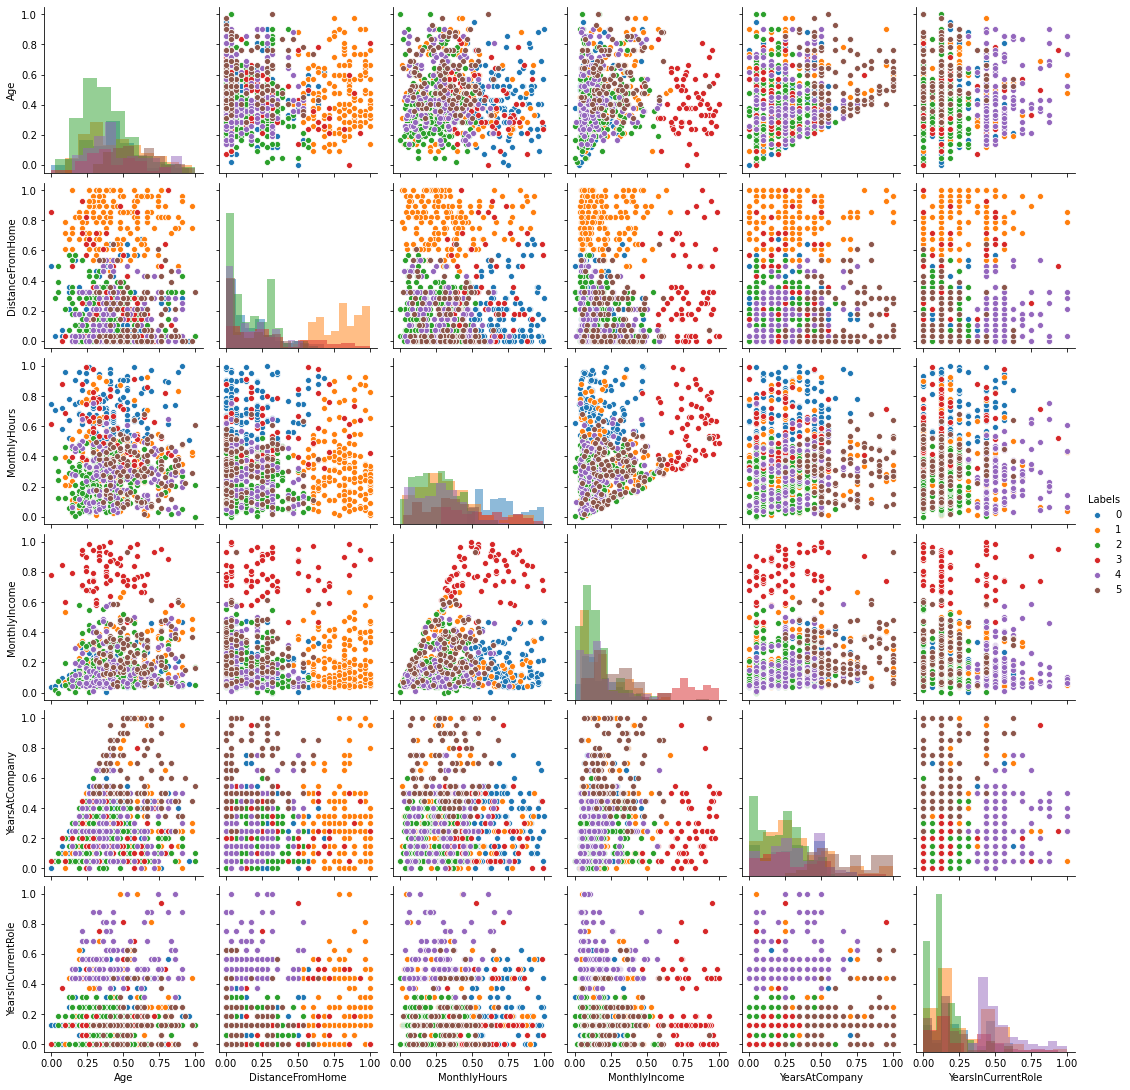

In [30]:
sns.pairplot(df_clusters_2, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")